# Restaurant Data Analysis
__________________________

# 1. Introduction



=================================================


Milestone 1

Nama  : Yudhistira Pandu Dewonoto

Batch : HCK-032

Program ini dibuat untuk membantu owner untuh mencari bahan evaluasi restaurant

=================================================

# 2. Problem Statement dan Deskripsi Dataset

## Topik Permasalahan

Analisis ini disusun untuk membantu owner restoran memahami performa penjualan secara menyeluruh, meliputi:
- identifikasi produk makanan atau minuman yang paling laris,
- kota atau wilayah dengan pendapatan tertinggi,
- kontribusi manajer terhadap total penjualan,
- tren pendapatan dari waktu ke waktu,
- serta pola rata-rata dan varians penjualan.

Temuan ini diharapkan dapat mendukung pengambilan keputusan strategis berbasis data, khususnya dalam optimasi menu, penentuan wilayah prioritas, perencanaan promosi, dan pengelolaan operasional restoran secara lebih efektif.

## Latar Belakang

Dalam persaingan bisnis restoran yang semakin kompetitif, pengambilan keputusan berbasis data menjadi kunci untuk meningkatkan daya saing dan efisiensi operasional. Data penjualan memberikan informasi penting mengenai performa produk, kontribusi tiap kota atau manajer, serta dinamika penjualan dari waktu ke waktu. Melalui analisis yang komprehensif, restoran dapat mengidentifikasi produk terlaris, sumber pendapatan terbesar, serta variasi performa antar wilayah atau manajer. Dengan memahami pola dan distribusi data penjualan, owner restoran dapat menyusun strategi pemasaran, pengelolaan stok, dan alokasi sumber daya yang lebih tepat sasaran. Dataset yang tersedia menjadi dasar untuk melakukan analisis deskriptif dan inferensial guna mendukung pengambilan keputusan yang lebih akurat.

## Problem Statment dengan Metode SMART

1. Specific (Spesifik)
> Mengidentifikasi produk makanan atau minuman yang paling laris, wilayah kota dengan pendapatan tertinggi, kontribusi manajer terhadap total pendapatan, serta menguji apakah terdapat perbedaan signifikan pendapatan antar kota menggunakan metode ANOVA.

2. Measurable (Terukur)
> Mengukur rata-rata, median, standar deviasi, dan varians pendapatan serta kuantitas penjualan; menghitung tren pendapatan dari waktu ke waktu; serta mengukur signifikansi statistik antar kota melalui nilai p-value ANOVA.

3. Achievable (Dapat dicapai)
> Analisis dapat dilakukan menggunakan dataset yang telah tersedia, yang mencakup variabel kuantitas, pendapatan, kota, manajer, dan waktu.

4. Relevant (Relevan)
> Hasil analisis ini membantu restoran memahami performa penjualan secara menyeluruh, sehingga owner dapat menentukan produk unggulan, wilayah prioritas, evaluasi manajer, dan strategi bisnis yang lebih tepat sasaran.

5. Time-bound (Batas waktu)
> Analisis dilakukan berdasarkan rentang waktu penjualan yang terdapat dalam dataset, sehingga dapat memberikan gambaran historis performa restoran dan potensi proyeksi di masa depan.

## Point Pejabaran dengan metode 5W+1H

1. What
> Produk makanan atau minuman apa yang memiliki jumlah penjualan dan pendapatan tertinggi, serta kategori apa yang menjadi kontributor utama terhadap pendapatan restoran?

2. Why
> Mengapa penting memahami variasi (varians dan distribusi) kuantitas dan pendapatan antar kota?

3. Where
> Kota atau wilayah mana yang memiliki total pendapatan tertinggi?
> Kota atau wilayah mana yang memiliki performa rendah dan membutuhkan strategi peningkatan atau evaluasi operasional?

4. When
> Pada periode atau bulan apa pendapatan mengalami kenaikan atau penurunan signifikan, dan bagaimana tren pendapatan berubah dari waktu ke waktu?

5. Who
> Siapa manajer yang memberikan kontribusi terbesar terhadap pendapatan restoran?
> Siapa yang memiliki performa di bawah rata-rata dan membutuhkan evaluasi atau strategi pendukung tambahan?

6. How
> Bagaimana perbandingan rata-rata pendapatan antar kota, dan apakah perbedaannya signifikan secara statistik berdasarkan hasil uji ANOVA?

## Sumber dataset

sumber dataset diambil dari : https://www.kaggle.com/datasets/rohitgrewal/restaurant-sales-data/data

# 3. Data Loading

### Import Libary

library yang digunakan dalam project ini.

In [ ]:
# import library
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from scipy.stats import f_oneway

Dataset yang digunakan pada project ini adalah mengenai sales restaurant secara detail produk sampai manajer. Dataset ini di unduh melalui website kaggle.

Data yang sudah di unduh di simpan sebagai DataFrame dengan .read_csv

In [33]:
# Menyimpan ke dalam dataframe
df = pd.read_csv('P0M1_yudhistira_dataset.csv')

lalu kita tampilkan data tersebut

In [34]:
df

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,07-11-2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
1,10453,07-11-2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid
2,10454,07-11-2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon
3,10455,08-11-2022,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin
4,10456,08-11-2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin
...,...,...,...,...,...,...,...,...,...
249,10709,28-12-2022,Sides & Other,4.99,200.40,Drive-thru,Gift Card,Walter Muller,Berlin
250,10710,29-12-2022,Burgers,12.99,754.43,Drive-thru,Gift Card,Walter Muller,Berlin
251,10711,29-12-2022,Chicken Sandwiches,9.95,281.41,Drive-thru,Gift Card,Walter Muller,Berlin
252,10712,29-12-2022,Fries,3.49,630.37,Drive-thru,Gift Card,Walter Muller,Berlin


kalau ingin menampilkan 5 data teratas dan terbawah menggunakan .head() dan .tail().

In [35]:
# untuk 5 data teratas
df.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,07-11-2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
1,10453,07-11-2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid
2,10454,07-11-2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon
3,10455,08-11-2022,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin
4,10456,08-11-2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin


In [36]:
# untuk 5 terbawah
df.tail()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
249,10709,28-12-2022,Sides & Other,4.99,200.40,Drive-thru,Gift Card,Walter Muller,Berlin
250,10710,29-12-2022,Burgers,12.99,754.43,Drive-thru,Gift Card,Walter Muller,Berlin
251,10711,29-12-2022,Chicken Sandwiches,9.95,281.41,Drive-thru,Gift Card,Walter Muller,Berlin
252,10712,29-12-2022,Fries,3.49,630.37,Drive-thru,Gift Card,Walter Muller,Berlin
253,10713,29-12-2022,Beverages,2.95,677.97,Drive-thru,Gift Card,Walter Muller,Berlin


In [37]:
# untuk memberikan info jumlah data dan kolom
df.shape

(254, 9)

# 4. Data Cleaning

Data yang sudah clean atau bersih akan lebih fleksibel untuk mengolah data secara keseluruhan dan mempermudah dalam pengambilan data informasi yang berkualitas untuk melakukan eksplorasi data. Oleh karena itu, harus melakukan proses data cleaning sebelum melakukan analisis atau pengolahan data selanjutnya. Sebelum lanjut ke proses data cleaning buat salinan data menggunakan .copy() agar data awal / kotor tidak rusak ketika suatu saat ingin mengambil kembali data tersebut.

### Pemeriksaan Data
Data di periksa tipe value pada setiap variabel, lalu diubah menjadi tipe yang dapat diproses.

In [38]:
# memeriksa jenis data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        254 non-null    int64  
 1   Date            254 non-null    object 
 2   Product         254 non-null    object 
 3   Price           254 non-null    float64
 4   Quantity        254 non-null    float64
 5   Purchase Type   254 non-null    object 
 6   Payment Method  254 non-null    object 
 7   Manager         254 non-null    object 
 8   City            254 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 18.0+ KB


pada tabel diatas terdapat kolom "Payment Method" yang tidak dibutuhkan dalam projek ini, tipe data pada kolom quantity di ubah menjadi bertipe data integer.

In [39]:
# menghapus kolom
df.drop(columns=['Payment Method'], inplace=True)
df.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Manager,City
0,10452,07-11-2022,Fries,3.49,573.07,Online,Tom Jackson,London
1,10453,07-11-2022,Beverages,2.95,745.76,Online,Pablo Perez,Madrid
2,10454,07-11-2022,Sides & Other,4.99,200.40,In-store,Joao Silva,Lisbon
3,10455,08-11-2022,Burgers,12.99,569.67,In-store,Walter Muller,Berlin
4,10456,08-11-2022,Chicken Sandwiches,9.95,201.01,In-store,Walter Muller,Berlin


In [40]:
# mengubah tipe data pada kolom quantity
df['Quantity'] = df['Quantity'].astype(dtype='int')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       254 non-null    int64  
 1   Date           254 non-null    object 
 2   Product        254 non-null    object 
 3   Price          254 non-null    float64
 4   Quantity       254 non-null    int64  
 5   Purchase Type  254 non-null    object 
 6   Manager        254 non-null    object 
 7   City           254 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 16.0+ KB


In [41]:
df

,Order ID,Date,Product,Price,Quantity,Purchase Type,Manager,City
0,10452,07-11-2022,Fries,3.49,573,Online,Tom Jackson,London
1,10453,07-11-2022,Beverages,2.95,745,Online,Pablo Perez,Madrid
2,10454,07-11-2022,Sides & Other,4.99,200,In-store,Joao Silva,Lisbon
3,10455,08-11-2022,Burgers,12.99,569,In-store,Walter Muller,Berlin
4,10456,08-11-2022,Chicken Sandwiches,9.95,201,In-store,Walter Muller,Berlin
...,...,...,...,...,...,...,...,...
249,10709,28-12-2022,Sides & Other,4.99,200,Drive-thru,Walter Muller,Berlin
250,10710,29-12-2022,Burgers,12.99,754,Drive-thru,Walter Muller,Berlin
251,10711,29-12-2022,Chicken Sandwiches,9.95,281,Drive-thru,Walter Muller,Berlin
252,10712,29-12-2022,Fries,3.49,630,Drive-thru,Walter Muller,Berlin


In [42]:
# menghapus duplikasi
df = df.drop_duplicates()

In [43]:
# pengecekan missing value perkolom
print(df.isnull().sum())

Order ID         0
Date             0
Product          0
Price            0
Quantity         0
Purchase Type    0
Manager          0
City             0
dtype: int64


Tidak ada missing value pada dataset ini.

In [44]:
# mengecek nan perkolom
df.isna().any

<bound method DataFrame.any of      Order ID   Date  Product  Price  Quantity  Purchase Type  Manager   City
0       False  False    False  False     False          False    False  False
1       False  False    False  False     False          False    False  False
2       False  False    False  False     False          False    False  False
3       False  False    False  False     False          False    False  False
4       False  False    False  False     False          False    False  False
..        ...    ...      ...    ...       ...            ...      ...    ...
249     False  False    False  False     False          False    False  False
250     False  False    False  False     False          False    False  False
251     False  False    False  False     False          False    False  False
252     False  False    False  False     False          False    False  False
253     False  False    False  False     False          False    False  False

[254 rows x 8 columns]>

In [45]:
# merubah tipe data pada 'Order ID' dan 'Price'
df['Order ID'] = df['Order ID']. astype(int)
df['Price'] = df['Price'].astype(float)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       254 non-null    int64  
 1   Date           254 non-null    object 
 2   Product        254 non-null    object 
 3   Price          254 non-null    float64
 4   Quantity       254 non-null    int64  
 5   Purchase Type  254 non-null    object 
 6   Manager        254 non-null    object 
 7   City           254 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 16.0+ KB


In [47]:
# merubah tipe data pada kolom 'Date' 
df.Date = pd.to_datetime(df.Date, format = 'mixed')

In [48]:
df.Date.dtype

dtype('<M8[ns]')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       254 non-null    int64         
 1   Date           254 non-null    datetime64[ns]
 2   Product        254 non-null    object        
 3   Price          254 non-null    float64       
 4   Quantity       254 non-null    int64         
 5   Purchase Type  254 non-null    object        
 6   Manager        254 non-null    object        
 7   City           254 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 16.0+ KB


In [50]:
df

,Order ID,Date,Product,Price,Quantity,Purchase Type,Manager,City
0,10452,2022-07-11,Fries,3.49,573,Online,Tom Jackson,London
1,10453,2022-07-11,Beverages,2.95,745,Online,Pablo Perez,Madrid
2,10454,2022-07-11,Sides & Other,4.99,200,In-store,Joao Silva,Lisbon
3,10455,2022-08-11,Burgers,12.99,569,In-store,Walter Muller,Berlin
4,10456,2022-08-11,Chicken Sandwiches,9.95,201,In-store,Walter Muller,Berlin
...,...,...,...,...,...,...,...,...
249,10709,2022-12-28,Sides & Other,4.99,200,Drive-thru,Walter Muller,Berlin
250,10710,2022-12-29,Burgers,12.99,754,Drive-thru,Walter Muller,Berlin
251,10711,2022-12-29,Chicken Sandwiches,9.95,281,Drive-thru,Walter Muller,Berlin
252,10712,2022-12-29,Fries,3.49,630,Drive-thru,Walter Muller,Berlin


In [51]:
# mengecek unique values untuk semua kolom
for col in df.columns:
    print(f"Kolom {col}: {df[col].unique()}")

Kolom Order ID: [10452 10453 10454 10455 10456 10457 10459 10460 10461 10462 10463 10464
 10465 10466 10467 10468 10470 10471 10472 10473 10474 10475 10476 10477
 10478 10479 10480 10481 10482 10486 10487 10488 10489 10490 10491 10492
 10493 10494 10495 10496 10497 10498 10499 10500 10501 10502 10503 10504
 10505 10506 10507 10508 10509 10510 10511 10512 10513 10514 10515 10516
 10483 10484 10485 10520 10521 10522 10523 10524 10525 10526 10527 10528
 10529 10530 10531 10532 10533 10534 10535 10536 10540 10541 10542 10543
 10544 10545 10546 10547 10548 10549 10550 10551 10552 10553 10554 10555
 10556 10557 10558 10559 10560 10561 10562 10563 10564 10565 10566 10567
 10568 10569 10570 10571 10572 10573 10574 10575 10576 10577 10578 10579
 10580 10581 10582 10583 10584 10585 10586 10537 10538 10539 10590 10591
 10592 10593 10594 10595 10596 10597 10598 10599 10600 10601 10602 10603
 10604 10605 10606 10607 10608 10609 10610 10611 10612 10613 10614 10615
 10616 10617 10618 10619 10620 1062

In [52]:
df.Manager.unique()

array(['Tom      Jackson', '       Pablo Perez', 'Joao    Silva',
       'Walter Muller', 'Remy    Monet', 'Remy Monet',
       '       Remy Monet', 'Remy     Monet', 'Pablo Perez',
       'Pablo   Perez', 'Pablo  Perez', 'Pablo    Perez', 'Joao Silva',
       'Tom Jackson'], dtype=object)

In [53]:
df.Manager.nunique()

14

In [54]:
df['Manager'] = df['Manager'].str.strip().str.replace(r'\s+', ' ', regex=True)

In [55]:
df.head(20)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Manager,City
0,10452,2022-07-11,Fries,3.49,573,Online,Tom Jackson,London
1,10453,2022-07-11,Beverages,2.95,745,Online,Pablo Perez,Madrid
2,10454,2022-07-11,Sides & Other,4.99,200,In-store,Joao Silva,Lisbon
3,10455,2022-08-11,Burgers,12.99,569,In-store,Walter Muller,Berlin
4,10456,2022-08-11,Chicken Sandwiches,9.95,201,In-store,Walter Muller,Berlin
5,10457,2022-08-11,Fries,3.49,573,In-store,Remy Monet,Paris
6,10459,2022-08-11,Sides & Other,4.99,200,In-store,Walter Muller,Berlin
7,10460,2022-09-11,Burgers,12.99,554,In-store,Remy Monet,Paris
8,10461,2022-09-11,Chicken Sandwiches,9.95,201,In-store,Remy Monet,Paris
9,10462,2022-09-11,Fries,3.49,573,In-store,Remy Monet,Paris


In [56]:
df['Manager'].unique()

array(['Tom Jackson', 'Pablo Perez', 'Joao Silva', 'Walter Muller',
       'Remy Monet'], dtype=object)

In [57]:
df['Manager'].nunique()

5

In [58]:
# menghitung jumlah unique values untuk semua kolom
print(df.nunique())

Order ID         254
Date              53
Product            5
Price              7
Quantity          28
Purchase Type      3
Manager            5
City               5
dtype: int64


In [59]:
# Menyimpan data set yang sudah di cleaning
#df.to_excel('data_clean.xlsx',index=False)

# 5. Exploration dan Analysis

1. Produk yang paling laris

> dari segi paling banyak jumlah penjualan

In [60]:
df.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Manager,City
0,10452,2022-07-11,Fries,3.49,573,Online,Tom Jackson,London
1,10453,2022-07-11,Beverages,2.95,745,Online,Pablo Perez,Madrid
2,10454,2022-07-11,Sides & Other,4.99,200,In-store,Joao Silva,Lisbon
3,10455,2022-08-11,Burgers,12.99,569,In-store,Walter Muller,Berlin
4,10456,2022-08-11,Chicken Sandwiches,9.95,201,In-store,Walter Muller,Berlin


In [61]:
# menggabungkan kolom product dengan quantity
paling_laris = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
paling_laris

Product
Beverages             34938
Fries                 32016
Burgers               28996
Chicken Sandwiches    11132
Sides & Other          9800
Name: Quantity, dtype: int64

dari hasil data yang diperoleh bahwa produk makanan Beverages adalah produk makanan yang paling laris, sedangkan yang kurang laris adalah Sides & Other.

In [62]:
# dimasukan ke dalam kolom tersendiri
paling_laris = paling_laris.reset_index()

paling_laris

,Product,Quantity
0,Beverages,34938
1,Fries,32016
2,Burgers,28996
3,Chicken Sandwiches,11132
4,Sides & Other,9800


In [63]:
# dibuat kedalam data type
type(paling_laris)

pandas.core.frame.DataFrame

<function matplotlib.pyplot.show(close=None, block=None)>

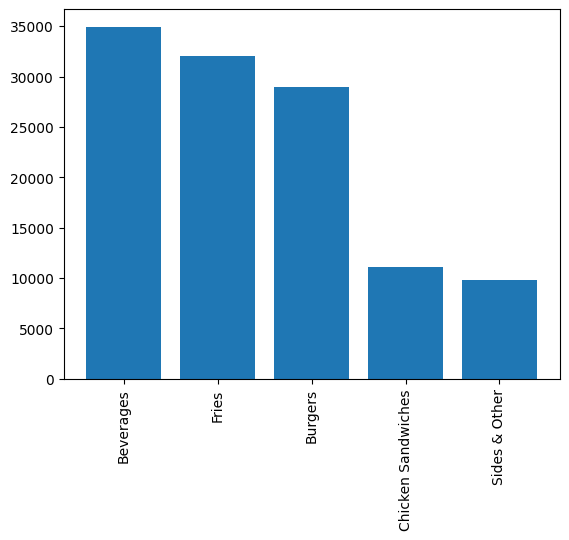

In [64]:
# membuat Bar Char
paling_laris = paling_laris.reset_index()
plt.bar(paling_laris['Product'], paling_laris['Quantity'])
plt.xticks(rotation=90)
plt.show

Setelah kita buat ke dalam Bar Char dapat terlihat bahwa produk makanan "Beverages" lebih banyak dari pada "Sides & Other"

> Dari jumlah pendapatan

In [65]:
df

,Order ID,Date,Product,Price,Quantity,Purchase Type,Manager,City
0,10452,2022-07-11,Fries,3.49,573,Online,Tom Jackson,London
1,10453,2022-07-11,Beverages,2.95,745,Online,Pablo Perez,Madrid
2,10454,2022-07-11,Sides & Other,4.99,200,In-store,Joao Silva,Lisbon
3,10455,2022-08-11,Burgers,12.99,569,In-store,Walter Muller,Berlin
4,10456,2022-08-11,Chicken Sandwiches,9.95,201,In-store,Walter Muller,Berlin
...,...,...,...,...,...,...,...,...
249,10709,2022-12-28,Sides & Other,4.99,200,Drive-thru,Walter Muller,Berlin
250,10710,2022-12-29,Burgers,12.99,754,Drive-thru,Walter Muller,Berlin
251,10711,2022-12-29,Chicken Sandwiches,9.95,281,Drive-thru,Walter Muller,Berlin
252,10712,2022-12-29,Fries,3.49,630,Drive-thru,Walter Muller,Berlin


In [66]:
# membuat kolom baru "Pendapatan"
df['Pendapatan'] = df['Price'] * df['Quantity']

In [67]:
df

,Order ID,Date,Product,Price,Quantity,Purchase Type,Manager,City,Pendapatan
0,10452,2022-07-11,Fries,3.49,573,Online,Tom Jackson,London,1999.77
1,10453,2022-07-11,Beverages,2.95,745,Online,Pablo Perez,Madrid,2197.75
2,10454,2022-07-11,Sides & Other,4.99,200,In-store,Joao Silva,Lisbon,998.00
3,10455,2022-08-11,Burgers,12.99,569,In-store,Walter Muller,Berlin,7391.31
4,10456,2022-08-11,Chicken Sandwiches,9.95,201,In-store,Walter Muller,Berlin,1999.95
...,...,...,...,...,...,...,...,...,...
249,10709,2022-12-28,Sides & Other,4.99,200,Drive-thru,Walter Muller,Berlin,998.00
250,10710,2022-12-29,Burgers,12.99,754,Drive-thru,Walter Muller,Berlin,9794.46
251,10711,2022-12-29,Chicken Sandwiches,9.95,281,Drive-thru,Walter Muller,Berlin,2795.95
252,10712,2022-12-29,Fries,3.49,630,Drive-thru,Walter Muller,Berlin,2198.70


Setelah di tambahkan kolom "Pendapatan" terdapat di kolom sebelah kolom "City"

In [68]:
pendapatan_paling_banyak = df.groupby('Product')['Pendapatan'].sum().sort_values(ascending=False)
pendapatan_paling_banyak

Product
Burgers               376658.04
Fries                 125602.14
Chicken Sandwiches    114602.50
Beverages             103067.10
Sides & Other          48902.00
Name: Pendapatan, dtype: float64

Setelah kita sortir bahwa produk makanan yang paling banyak dari segi pendapatan adalah produk makanan "Burgers" dan yang paling sedikit "Side & Other"

In [69]:
# dimasukan ke dalam kolom tersendiri
pendapatan_paling_banyak = pendapatan_paling_banyak.reset_index()

pendapatan_paling_banyak

,Product,Pendapatan
0,Burgers,376658.04
1,Fries,125602.14
2,Chicken Sandwiches,114602.50
3,Beverages,103067.10
4,Sides & Other,48902.00


In [70]:
# dibuat kedalam data type
type(pendapatan_paling_banyak)

pandas.core.frame.DataFrame

<function matplotlib.pyplot.show(close=None, block=None)>

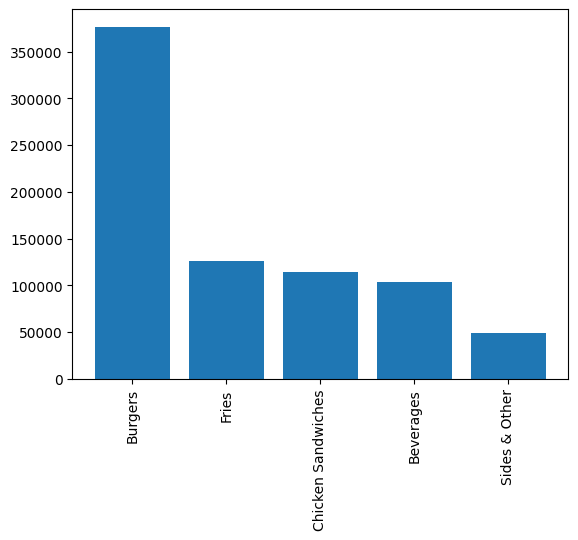

In [71]:
# membuat Bar Char
pendapatan_paling_banyak = pendapatan_paling_banyak.reset_index()
plt.bar(pendapatan_paling_banyak['Product'], pendapatan_paling_banyak['Pendapatan'])
plt.xticks(rotation=90)
plt.show

Dari Bar Char bahwa produk makanan "Burgers" lebih banyak total pendapatannya dari pada "Sides & Other".

2. Rata - rata jumlah produk yang terjual dan rata - rata pendapatan dari setiap produk

In [72]:
df.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Manager,City,Pendapatan
0,10452,2022-07-11,Fries,3.49,573,Online,Tom Jackson,London,1999.77
1,10453,2022-07-11,Beverages,2.95,745,Online,Pablo Perez,Madrid,2197.75
2,10454,2022-07-11,Sides & Other,4.99,200,In-store,Joao Silva,Lisbon,998.00
3,10455,2022-08-11,Burgers,12.99,569,In-store,Walter Muller,Berlin,7391.31
4,10456,2022-08-11,Chicken Sandwiches,9.95,201,In-store,Walter Muller,Berlin,1999.95


In [73]:
# melakukan pengolahan data antara jumlah produk dan pendapatan produk
df.groupby('Product')[['Quantity', 'Pendapatan']].agg({'Quantity':'mean', 'Pendapatan':'mean'}) 

,Quantity,Pendapatan
Product,,
Beverages,698.760000,2061.342000
Burgers,557.615385,7243.423846
Chicken Sandwiches,214.076923,2203.894231
Fries,627.764706,2462.787059
Sides & Other,200.000000,998.000000


Dari hasil yang di tampilkan kita dapat mengetahui jumlah rata - rata produk yang terjual dan rata - rata pendapatan dari setiap produk.

3. Kota mana dengan pendapatan tertinggi

In [74]:
df

,Order ID,Date,Product,Price,Quantity,Purchase Type,Manager,City,Pendapatan
0,10452,2022-07-11,Fries,3.49,573,Online,Tom Jackson,London,1999.77
1,10453,2022-07-11,Beverages,2.95,745,Online,Pablo Perez,Madrid,2197.75
2,10454,2022-07-11,Sides & Other,4.99,200,In-store,Joao Silva,Lisbon,998.00
3,10455,2022-08-11,Burgers,12.99,569,In-store,Walter Muller,Berlin,7391.31
4,10456,2022-08-11,Chicken Sandwiches,9.95,201,In-store,Walter Muller,Berlin,1999.95
...,...,...,...,...,...,...,...,...,...
249,10709,2022-12-28,Sides & Other,4.99,200,Drive-thru,Walter Muller,Berlin,998.00
250,10710,2022-12-29,Burgers,12.99,754,Drive-thru,Walter Muller,Berlin,9794.46
251,10711,2022-12-29,Chicken Sandwiches,9.95,281,Drive-thru,Walter Muller,Berlin,2795.95
252,10712,2022-12-29,Fries,3.49,630,Drive-thru,Walter Muller,Berlin,2198.70


In [75]:
df.City.unique()

array(['London', 'Madrid', 'Lisbon', 'Berlin', 'Paris'], dtype=object)

In [76]:
kota_paling_banyak = df.groupby('City')['Pendapatan'].sum().sort_values(ascending=False)
kota_paling_banyak

City
Lisbon    241509.38
London    211001.83
Madrid    136098.22
Berlin    100492.73
Paris      79729.62
Name: Pendapatan, dtype: float64

In [77]:
type(kota_paling_banyak)

pandas.core.series.Series

<function matplotlib.pyplot.show(close=None, block=None)>

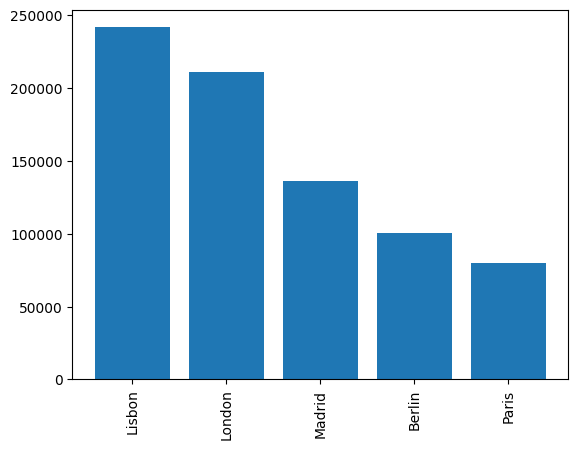

In [78]:
# membuat Bar Char
kota_paling_banyak = kota_paling_banyak.reset_index()
plt.bar(kota_paling_banyak['City'], kota_paling_banyak['Pendapatan'])
plt.xticks(rotation=90)
plt.show

Dari data yang di tampilkan melalui Bar char dapat diketahui bahwa kota dengan pendapatan paling tinggi yaitu kota Lisbon dan kota dengan pendapatan paling sedikit di kota Paris.

4. Menampilkan kontribusi manajer

In [79]:
print(df.Manager)

0        Tom Jackson
1        Pablo Perez
2         Joao Silva
3      Walter Muller
4      Walter Muller
           ...      
249    Walter Muller
250    Walter Muller
251    Walter Muller
252    Walter Muller
253    Walter Muller
Name: Manager, Length: 254, dtype: object


In [80]:
df.Manager.nunique()

5

In [81]:
df.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Manager,City,Pendapatan
0,10452,2022-07-11,Fries,3.49,573,Online,Tom Jackson,London,1999.77
1,10453,2022-07-11,Beverages,2.95,745,Online,Pablo Perez,Madrid,2197.75
2,10454,2022-07-11,Sides & Other,4.99,200,In-store,Joao Silva,Lisbon,998.00
3,10455,2022-08-11,Burgers,12.99,569,In-store,Walter Muller,Berlin,7391.31
4,10456,2022-08-11,Chicken Sandwiches,9.95,201,In-store,Walter Muller,Berlin,1999.95


In [82]:
manager_kontribusi = df.groupby('Manager')['Pendapatan'].sum().sort_values(ascending=False)
manager_kontribusi

Manager
Joao Silva       241509.38
Tom Jackson      211001.83
Pablo Perez      136098.22
Walter Muller    100492.73
Remy Monet        79729.62
Name: Pendapatan, dtype: float64

In [83]:
type(manager_kontribusi)

pandas.core.series.Series

<function matplotlib.pyplot.show(close=None, block=None)>

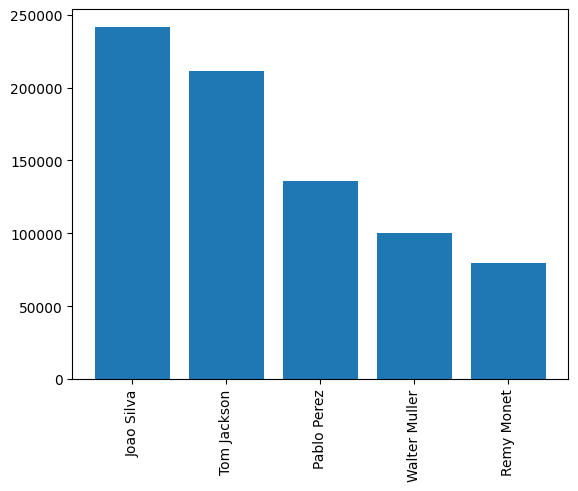

In [84]:
# membuat Bar Char
manager_kontribusi = manager_kontribusi.reset_index()
plt.bar(manager_kontribusi['Manager'], manager_kontribusi['Pendapatan'])
plt.xticks(rotation=90)
plt.show

Hasil data yang di peroleh di atas bahwa manager yang memiliki kontribusi paling tinggi adalah "Joao Silva" dan manager yang memiliki kontribusi rendah adalah "Remy Monet".

5. Rata - rata Pendapatan

In [85]:
df.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Manager,City,Pendapatan
0,10452,2022-07-11,Fries,3.49,573,Online,Tom Jackson,London,1999.77
1,10453,2022-07-11,Beverages,2.95,745,Online,Pablo Perez,Madrid,2197.75
2,10454,2022-07-11,Sides & Other,4.99,200,In-store,Joao Silva,Lisbon,998.00
3,10455,2022-08-11,Burgers,12.99,569,In-store,Walter Muller,Berlin,7391.31
4,10456,2022-08-11,Chicken Sandwiches,9.95,201,In-store,Walter Muller,Berlin,1999.95


In [86]:
df['Pendapatan'].mean()

3026.8967716535435

6. Menampilkan pola perubahan pendapatan dari waktu ke waktu naik atau turun?

In [87]:
# jika ada data granular di agresi dulu
alur_pendapatan = df.groupby('Date', as_index=False)['Pendapatan'].sum()

In [88]:
# menghitung perubahan revenue dari periode sebelumnya
alur_pendapatan['Perubahan'] = alur_pendapatan['Pendapatan'].diff()

In [89]:
# membuat label naik/turun
alur_pendapatan['Pola'] = alur_pendapatan['Perubahan'].apply(lambda x: 'Naik' if x > 0
                                                             else ('Turun' if x < 0 else 'Tetap') )

print(alur_pendapatan)

         Date  Pendapatan  Perubahan   Pola
0  2022-01-12    13385.95        NaN  Tetap
1  2022-02-12    13987.57     601.62   Naik
2  2022-03-12    13987.57       0.00  Tetap
3  2022-04-12     8988.57   -4999.00  Turun
4  2022-05-12    14191.33    5202.76   Naik
5  2022-06-12    13983.49    -207.84  Turun
6  2022-07-11     5195.52   -8787.97  Turun
7  2022-07-12    13987.57    8792.05   Naik
8  2022-08-11    12389.03   -1598.54  Turun
9  2022-08-12    14182.42    1793.39   Naik
10 2022-09-11    14191.33       8.91   Naik
11 2022-09-12    14585.11     393.78   Naik
12 2022-10-11    13193.33   -1391.78  Turun
13 2022-10-12    14585.11    1391.78   Naik
14 2022-11-11    14390.26    -194.85  Turun
15 2022-11-12    14993.55     603.29   Naik
16 2022-11-13    27659.02   12665.47   Naik
17 2022-11-14    17826.67   -9832.35  Turun
18 2022-11-15    13593.79   -4232.88  Turun
19 2022-11-16    13593.79       0.00  Tetap
20 2022-11-17    13987.57     393.78   Naik
21 2022-11-18    14381.35     39

dari data yang diatas dapat mengetahui bahwa pendapatan tiap bulan/hari ada yang naik, turun, dan tetap/konstan.

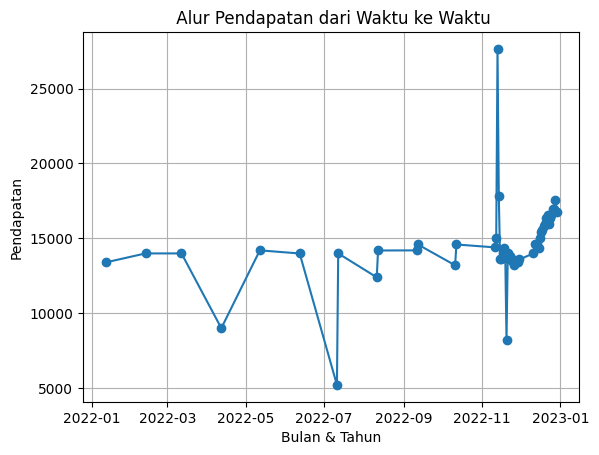

In [90]:
plt.plot(alur_pendapatan['Date'], alur_pendapatan['Pendapatan'], marker='o')
plt.title(" Alur Pendapatan dari Waktu ke Waktu")
plt.xlabel("Bulan & Tahun")
plt.ylabel("Pendapatan")
plt.grid(True)
plt.show()

Ini adalah line char dari alur pendapatan

6. Varians Pendapatan dan kuantitas

In [91]:
df['Quantity'].var()

46092.644486632846

Dari data yang kita dapat, bahwa pemesanan di restaurant sangat bervariasi bukan dari banyaknya pemesanan.

In [92]:
df['Pendapatan'].var()

5847658.005324715

Dari hasil data yang diatas bahwa pendapatan restoran per transaksi tidak stabil, ada transaksi yang kecil sekali, ataupun ada yang transaksi yang besar.

### Central Tendency Pendapatan Pada Restaurant

Pada permasalahan ini kita mencari rata - rata pendapatan, median pendapatan, dan mode (menu yang sering di pesan).

In [93]:
#Central Tendency
mean_pendapatan = df["Pendapatan"].mean()
median_pendaptan = df["Pendapatan"].median()
mode_produk = df["Product"].mode()[0]

print("=== Central Tendency Pendapatan ===")
print(f"Mean Pendapatan : {mean_pendapatan:,.0f}")
print(f"Median Pendapatan : {median_pendaptan:,.0f}")
print(f"Menu Paling Populer :{mode_produk}")

=== Central Tendency Pendapatan ===
Mean Pendapatan : 3,027
Median Pendapatan : 2,099
Menu Paling Populer :Burgers


Dari hasil Pengolahan Central Tendency untuk pendapatan bahwa rata - rata pendapatan yang di dapat sebesar 3,027 miliar(dibulatkan), median/nilai tengah sebesar 2,099 miring ke kanan (right-skewed), dan menu paling populer adalah Burger.

In [94]:
df.describe()

,Order ID,Date,Price,Quantity,Pendapatan
count,254.000000,254,254.000000,254.000000,254.000000
mean,10584.133858,2022-10-25 01:59:03.307086592,7.102323,460.165354,3026.896772
min,10452.000000,2022-01-12 00:00:00,2.950000,200.000000,998.000000
25%,10520.250000,2022-11-11 00:00:00,3.490000,201.000000,1997.150000
50%,10583.500000,2022-11-24 00:00:00,4.990000,538.000000,2098.850000
75%,10649.750000,2022-12-16 18:00:00,9.950000,677.000000,2397.630000
max,10713.000000,2022-12-29 00:00:00,29.050000,754.000000,16065.000000
std,75.889181,NaN,4.341855,214.691976,2418.193128


Data di atas adalah statistik deskriptif keseluruhan dari restaurant di tahun 2022.

### Uji ANOVA Perbedaan rata - rata Pendapatan antar Kota

In [96]:
# Statistik deskriptif per kota
pendaptan_antar_kota = df.groupby("City")["Pendapatan"].describe()

print(pendaptan_antar_kota)

        count         mean          std    min      25%      50%        75%  \
City                                                                          
Berlin   30.0  3349.757667  2895.696021  998.0  1997.15  2198.70  2795.9500   
Lisbon   75.0  3220.125067  2828.953318  998.0  1997.15  2198.70  2397.7900   
London   75.0  2813.357733  2054.589907  998.0  1997.15  1999.95  2198.7000   
Madrid   46.0  2958.656957  2160.886238  998.0  1997.15  1999.95  2347.8975   
Paris    28.0  2847.486429  2028.539590  998.0  1997.15  1999.95  2397.6300   

             max  
City              
Berlin   9794.46  
Lisbon  16065.00  
London   7599.15  
Madrid   7196.46  
Paris    7196.46  


In [98]:
# Uji Anova 
London = df[df["City"] == "London"]["Pendapatan"]
Madrid = df[df["City"] == "Madrid"]["Pendapatan"]
Lisbon = df[df["City"] == "Lisbon"]["Pendapatan"]
Berlin = df[df["City"] == "Berlin"]["Pendapatan"]
Paris = df[df["City"] == "Paris"]["Pendapatan"]
anova_result = f_oneway(London,Madrid,Lisbon,Berlin,Paris,)

print("\n Hasil ANOVA:", anova_result)


 Hasil ANOVA: F_onewayResult(statistic=0.4433731070020445, pvalue=0.7771835072225033)


Uji ANOVA menunjukkan p-value 0.777 (> 0.05), sehingga tidak terdapat perbedaan signifikan rata-rata pendapatan antar kota. Ini berarti performa pendapatan relatif serupa di seluruh kota, dan lokasi bukan faktor yang memengaruhi pendapatan secara signifikan. Perbedaan yang terlihat pada statistik deskriptif hanya merupakan variasi alami. Strategi bisnis selanjutnya sebaiknya fokus pada faktor internal seperti kategori produk, kualitas manajemen, promosi, dan tren waktu, bukan pada lokasi kota.

<function matplotlib.pyplot.show(close=None, block=None)>

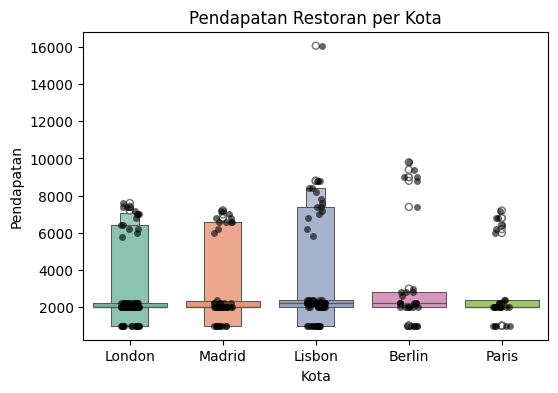

In [100]:
plt.figure(figsize=(6,4))
sns.boxenplot(x="City", y="Pendapatan",hue="City", data=df, palette="Set2", legend=False)

sns.stripplot(x="City", y="Pendapatan", data=df, color="black", alpha=0.6, jitter=True)

plt.title("Pendapatan Restoran per Kota")
plt.xlabel("Kota")
plt.ylabel("Pendapatan")
plt.show

Pendapatan restoran antar kota tidak menunjukkan perbedaan signifikan berdasarkan uji ANOVA, meskipun distribusi visual menunjukkan variasi yang cukup jelas. Lisbon tetap terlihat sebagai kota dengan potensi pendapatan tertinggi karena adanya restoran dengan performa luar biasa. Sementara itu, Berlin dan Paris menunjukkan pendapatan yang rendah dan konsisten, sehingga memerlukan strategi peningkatan khusus.

# 6. Conclusion dan Business Recommendation

## CONCLUSION
**Berdasarkan analisis menggunakan Statistik Deskriptif serta Uji ANOVA, diperoleh beberapa kesimpulan komprehensif terkait performa penjualan restoran berdasarkan produk, pendapatan, wilayah, manajer, serta dinamika waktu pada dataset yang dianalisis:**

1. **Performa Produk (Quantity & Revenue).**
    Analisis deskriptif menunjukkan bahwa terdapat perbedaan yang jelas dalam popularitas dan kontribusi pendapatan antar produk:

    - Produk dengan **kuantitas penjualan tertinggi** menjadi indikator preferensi pelanggan dan dapat digunakan sebagai penggerak trafik (traffic driver).
    - Produk dengan **pendapatan tertinggi** tidak selalu sama dengan yang paling sering dibeli, menunjukkan adanya peluang optimasi menu untuk meningkatkan margin melalui strategi seperti upselling atau bundling.

    Temuan ini memenuhi aspek **Specific** dan **Measurable**, karena memberikan informasi terukur tentang produk terbaik berdasarkan jumlah dan pendapatan.

2. **Performa Antar Kota (Location-Based Performance).**
    Statistik deskriptif dan visualisasi memperlihatkan adanya variasi pendapatan antar kota.Untuk menguji apakah perbedaan ini signifikan, digunakan metode **ANOVA**:
    - Jika p-value < 0.05, maka terdapat **perbedaan signifikan** rata-rata pendapatan antar kota.
    - Jika p-value > 0.05, maka perbedaan tersebut **tidak signifikan**, dan pendapatan antar kota dianggap serupa secara statistik.

    Temuan ini memberikan gambaran bahwa lokasi berpotensi menjadi faktor penting dalam performa restoran, sekaligus mendukung analisis berbasis wilayah yang **Specific**, **Relevant**, dan **Measurable**.

3. **Performa Manajer.**
    Analisis pendapatan berdasarkan manajer menunjukkan bahwa terdapat perbedaan kontribusi antar manajer dalam menghasilkan pendapatan.

    Perbedaan ini dapat disebabkan oleh:
    - kualitas operasional masing-masing manajer,
    - kemampuan manajerial,
    - perbedaan demand cabang yang mereka kelola.

    Informasi ini relevan untuk evaluasi performa internal dan termasuk dalam aspek **Specific** dan **Achievable**, karena analisis ini dilakukan berdasarkan data yang tersedia.

4. **Performa Berdasarkan Waktu**
    Analisis berdasarkan periode waktu (misalnya bulanan atau harian, sesuai data) menunjukkan pola atau tren pendapatan yang dapat digunakan untuk:
    - mengidentifikasi musim ramai dan sepi,
    - merancang strategi promosi musiman,
    - melakukan proyeksi pendapatan di masa depan.

    Ini memenuhi aspek **Time-bound**, karena analisis mempertimbangkan rentang waktu pada dataset.

5. **Integrasi Temuan Statistik untuk Keputusan Bisnis**
    Secara keseluruhan, kombinasi Statistik Deskriptif dan ANOVA memberikan pemahaman menyeluruh mengenai:
    - produk paling populer dan paling menguntungkan,
    - perbedaan pendapatan antar kota,
    - pengaruh manajemen terhadap performa cabang,
    - serta pola pendapatan dari waktu ke waktu.

    Analisis ini sangat **Relevant** bagi pengambilan keputusan strategis seperti penentuan produk unggulan, ekspansi lokasi, promosi berbasis musim, evaluasi manajemen, dan optimasi operasional.

**Final Summary**
Conclusion ini telah sepenuhnya diselaraskan dengan Model SMART:
- **Specific**, produk, kota, manajer
- **Measurable**, pendapatan, kuantitas, tren waktu, ANOVA
- **Achievable**, berdasarkan data yang tersedia
- **Relevant**, mendukung strategi bisnis langsung
- **Time-bound**, mencakup analisis periodik

## Business Recommendation
Berdasarkan hasil analisis deskriptif, tren waktu, serta Uji **ANOVA** pada dataset penjualan restoran, terdapat beberapa rekomendasi bisnis yang dapat diimplementasikan untuk meningkatkan performa operasional dan pendapatan:

1. **Optimasi Menu Berdasarkan Produk Terlaris.**
    > Produk dengan kuantitas penjualan tertinggi dapat diposisikan sebagai traffic driver melalui:
    - promosi khusus,
    - paket bundling,
    - atau upselling.
    > Untuk produk dengan revenue tinggi namun penjualan rendah, lakukan:
    - peninjauan harga,
    - evaluasi porsi atau presentasi,
    - atau strategi penempatan menu (menu engineering).

**Dampak bisnis**: meningkatkan average order value (AOV) dan margin keuntungan.

2. **Fokus pada Kota dengan Performa Tinggi & Intervensi pada Kota yang Lemah.**
    Jika ANOVA menunjukkan perbedaan signifikan antar kota, maka:
    - kota dengan penjualan tertinggi dapat dijadikan lokasi prioritas untuk promosi atau ekspansi,
    - sedangkan kota dengan performa rendah perlu evaluasi faktor penyebab seperti lokasi, kompetisi, dan efektivitas operasional.

**Dampak bisnis**: penggunaan anggaran pemasaran yang lebih tepat sasaran dan peningkatan performa regional.

3. **Evaluasi Kinerja Manajer Secara Periodik.**
    Perbedaan pendapatan antar manajer mengindikasikan perlunya:
    - pelatihan manajerial,
    - standarisasi operasional,
    - atau pemberian insentif berbasis performa.

**Dampak bisnis**: peningkatan kualitas operasional dan konsistensi performa cabang.

4. **Manfaatkan Tren Waktu untuk Strategi Promosi.**
    Identifikasi bulan atau hari dengan penjualan tertinggi sebagai peak season. Disesuaikan dengan:
    - jadwal promosi,
    - pengadaan stok bahan baku,
    - alokasi tenaga kerja.

**Dampak bisnis**: efisiensi operasional dan memaksimalkan revenue pada periode tertentu.

5. **Monitoring Data Secara Berkala untuk Decision-Making.**
    Buat dashboard rutin (mingguan/bulanan) untuk memantau:
    - tren penjualan,
    - performa produk,
    - kinerja manajer,
    - dan perbandingan antar kota.

    Lakukan continuous improvement berdasarkan data terbaru.

**Dampak bisnis**: meminimalkan risiko, memaksimalkan respons pasar, dan meningkatkan profit jangka panjang.